<a href="https://colab.research.google.com/github/AdityaKendre02/Flight-Delay-Prediction_ML-Project/blob/main/Flight_Delay_Prediction_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing basic libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Getting the Data**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DAV Selection Assignment/Question 2 Dataset /flight_delays_train.csv')

Data Preprocessing and EDA

In [ ]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [ ]:
df['Month'] = df['Month'].apply(lambda Month: Month.split('-')[1])
df['DayofMonth'] = df['DayofMonth'].apply(lambda DayofMonth: DayofMonth.split('-')[1])
df['DayOfWeek'] = df['DayOfWeek'].apply(lambda DayOfWeek: DayOfWeek.split('-')[1])
df['Month'] = pd.to_numeric(df['Month'])
df['DayofMonth'] = pd.to_numeric(df['DayofMonth'])
df['DayOfWeek'] = pd.to_numeric(df['DayOfWeek'])

In [ ]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N
3,11,25,6,1015,OO,DEN,MEM,872,N
4,10,7,6,1828,WN,MDW,OMA,423,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  int64 
 1   DayofMonth         100000 non-null  int64 
 2   DayOfWeek          100000 non-null  int64 
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(5), object(4)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,Month,DayofMonth,DayOfWeek,DepTime,Distance
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000
mean,6.537640,15.703850,3.95183,1341.523880,729.39716
std,3.413447,8.793931,1.99164,476.378445,574.61686
min,1.000000,1.000000,1.00000,1.000000,30.00000
25%,4.000000,8.000000,2.00000,931.000000,317.00000
50%,7.000000,16.000000,4.00000,1330.000000,575.00000
75%,9.000000,23.000000,6.00000,1733.000000,957.00000
max,12.000000,31.000000,7.00000,2534.000000,4962.00000


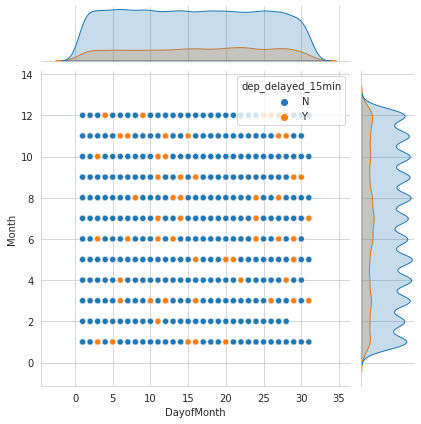

In [ ]:
sns.set_style('whitegrid')
sns.jointplot(x='DayofMonth',y='Month',data=df, hue='dep_delayed_15min')

Clearly, there are flight delays around 23,24 and 25th December reason being Christmas

We will make a countplot to see if the Training Data has uniform Yes and No

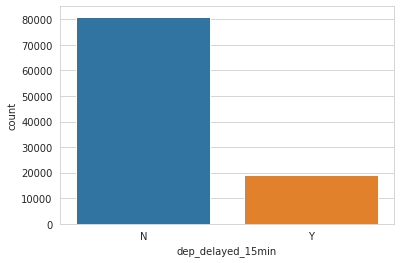

In [ ]:
sns.countplot(x='dep_delayed_15min',data=df)

We saw that there is non-uniformity in the training data given, so even if we get a good accuracy, it does not mean that our model prediction is good since the model can just answer no every time and get an okayish accuracy

So we need to keep in mind that we need other metrics also to see our model's prediction performance

<Figure size 864x216 with 0 Axes>

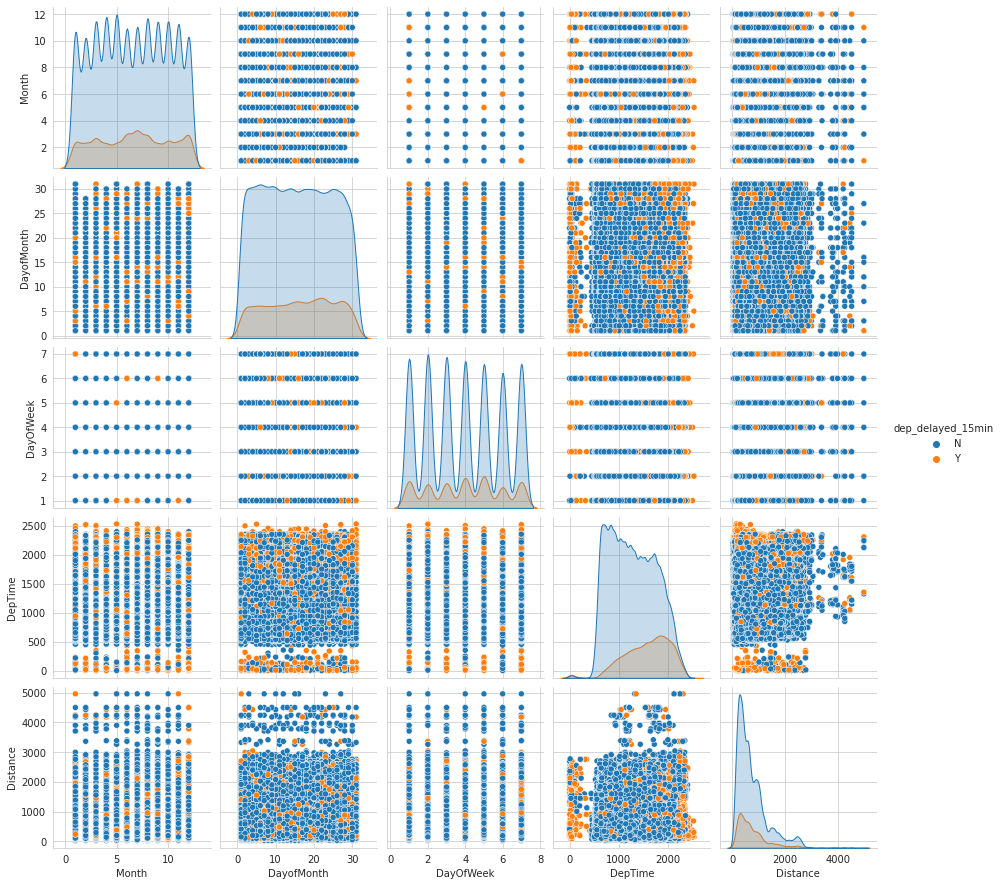

In [ ]:
plt.figure(figsize=(12,3))
sns.pairplot(df,hue='dep_delayed_15min')

**So we can see from the Month - DayofMonth graph that near 25th December the flights are delayed and also flights from 9PM to 2AM are generally delayed from the Distance - DepTime Graph**

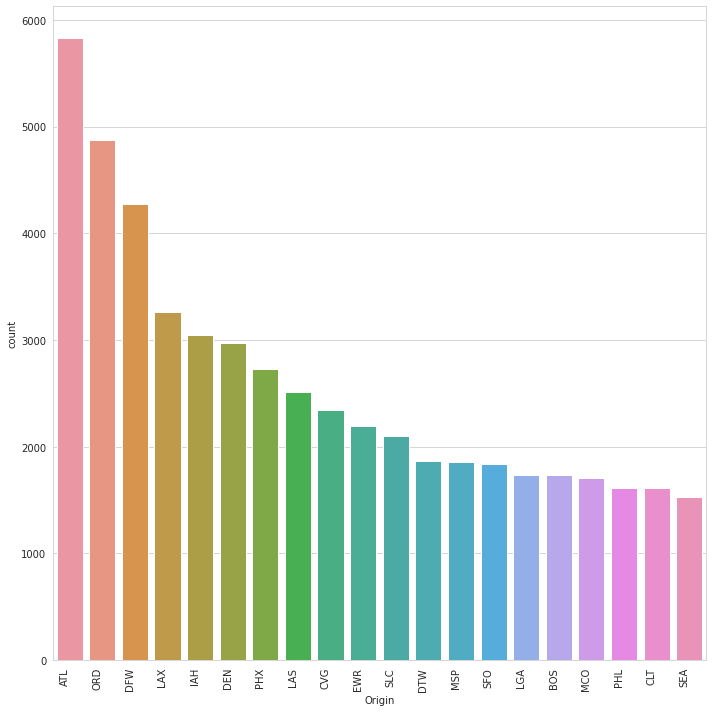

In [ ]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=df['Origin'], data =df, order=df['Origin'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

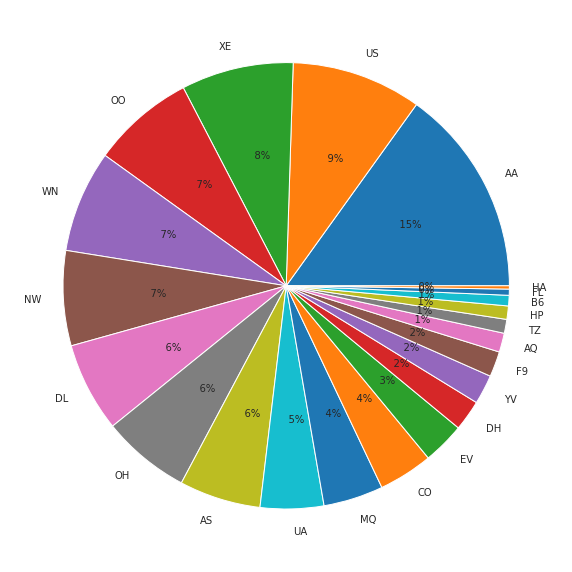

In [ ]:
axis = plt.subplots(figsize=(10,14))
Name = df["UniqueCarrier"].unique()
size = df["UniqueCarrier"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

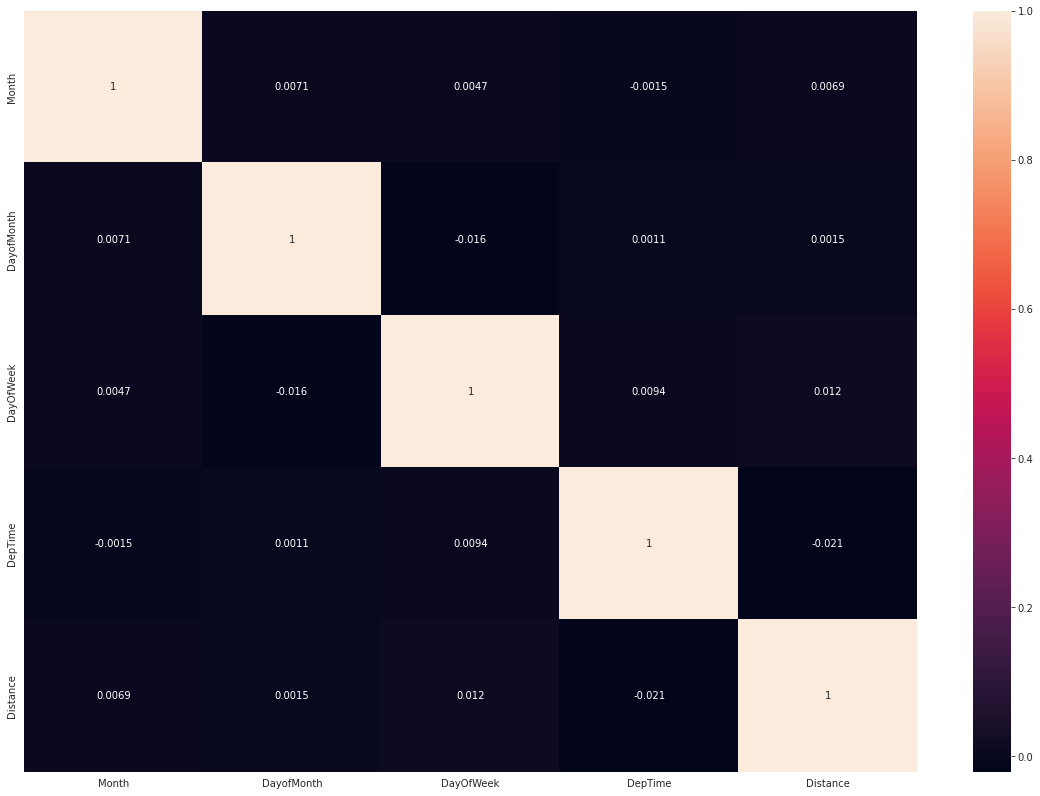

In [ ]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [ ]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N
3,11,25,6,1015,OO,DEN,MEM,872,N
4,10,7,6,1828,WN,MDW,OMA,423,Y


In [ ]:
flights=pd.DataFrame(df)
flights['DayOfWeek']= df['DayOfWeek'].apply(str)
flights["DayOfWeek"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,SATURDAY,1934,AA,ATL,DFW,732,N
1,4,20,TUESDAY,1548,US,PIT,MCO,834,N
2,9,2,THURSDAY,1422,XE,RDU,CLE,416,N
3,11,25,FRIDAY,1015,OO,DEN,MEM,872,N
4,10,7,FRIDAY,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,5,4,TUESDAY,1618,OO,SFO,RDD,199,N
99996,1,18,TUESDAY,804,CO,EWR,DAB,884,N
99997,1,24,MONDAY,1901,NW,DTW,IAH,1076,N
99998,4,27,WEDNESDAY,1515,MQ,DFW,GGG,140,N


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['UniqueCarrier', 'Origin','Dest','DayOfWeek'],drop_first=True)
one_hot_encoded_data

,Month,DayofMonth,DepTime,Distance,dep_delayed_15min,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DH,...,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YUM,DayOfWeek_MONDAY,DayOfWeek_SATURDAY,DayOfWeek_SUNDAY,DayOfWeek_THURSDAY,DayOfWeek_TUESDAY,DayOfWeek_WEDNESDAY
0,8,21,1934,732,N,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4,20,1548,834,N,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9,2,1422,416,N,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,11,25,1015,872,N,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,7,1828,423,Y,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,4,1618,199,N,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
99996,1,18,804,884,N,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
99997,1,24,1901,1076,N,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99998,4,27,1515,140,N,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
final_data = one_hot_encoded_data.sample(n=60000)
final_data

,Month,DayofMonth,DepTime,Distance,dep_delayed_15min,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DH,...,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YUM,DayOfWeek_MONDAY,DayOfWeek_SATURDAY,DayOfWeek_SUNDAY,DayOfWeek_THURSDAY,DayOfWeek_TUESDAY,DayOfWeek_WEDNESDAY
29978,1,9,832,992,N,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21919,4,2,1255,174,N,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
66095,11,20,1641,594,N,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31750,3,12,557,351,N,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62808,1,26,1132,1258,N,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61110,10,1,1505,419,Y,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85637,1,3,1915,337,Y,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27804,10,12,1344,802,Y,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18054,6,29,1050,741,N,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
final_data.shape

(60000, 608)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X=final_data.drop("dep_delayed_15min",axis=1)
Y=final_data.dep_delayed_15min

In [ ]:
X

,Month,DayofMonth,DepTime,Distance,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DH,UniqueCarrier_DL,...,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YUM,DayOfWeek_MONDAY,DayOfWeek_SATURDAY,DayOfWeek_SUNDAY,DayOfWeek_THURSDAY,DayOfWeek_TUESDAY,DayOfWeek_WEDNESDAY
29978,1,9,832,992,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21919,4,2,1255,174,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
66095,11,20,1641,594,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31750,3,12,557,351,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62808,1,26,1132,1258,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61110,10,1,1505,419,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85637,1,3,1915,337,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27804,10,12,1344,802,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18054,6,29,1050,741,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
Y

29978    N
21919    N
66095    N
31750    N
62808    N
        ..
61110    Y
85637    Y
27804    Y
18054    N
19       N
Name: dep_delayed_15min, Length: 60000, dtype: object

In [ ]:
Y.replace({'N': 0, 'Y': 1}, inplace=True)

In [ ]:
Y

29978    0
21919    0
66095    0
31750    0
62808    0
        ..
61110    1
85637    1
27804    1
18054    0
19       0
Name: dep_delayed_15min, Length: 60000, dtype: int64

# I am doing the Model Building using the Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train,y_train)

0.8743973012259366

In [ ]:
reg_rf.score(X_test,y_test)

0.09836774135019533

In [ ]:
metrics.r2_score(y_test,y_pred)

0.09836774135019533

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.2581825
MSE: 0.1402454916666667
RMSE: 0.3744936470311168


In [ ]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
69707,0,0.22
56374,0,0.23
15233,0,0.23
58030,1,0.51
96413,0,0.07
...,...,...
80991,0,0.24
71041,0,0.09
12937,0,0.07
90584,0,0.22


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   5.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  10.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  11.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 113}

In [ ]:
p=rf_random.predict(X_test)

In [ ]:
metrics.r2_score(y_test,p)

0.11771307509702944

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 0.2692592084904502
MSE: 0.13723639808471857
RMSE: 0.3704543130869427


In [ ]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
69707,0,0.180531
56374,0,0.278370
15233,0,0.205727
58030,1,0.350785
96413,0,0.149607
...,...,...
80991,0,0.244239
71041,0,0.198070
12937,0,0.123778
90584,0,0.246103


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [ ]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 0.28122193987473976
MSE: 0.13958390881992477
RMSE: 0.3736092996967886


In [ ]:
metrics.r2_score(y_test,pre)

0.10262102913366034

In [ ]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
69707,0,0.205741
56374,0,0.379408
15233,0,0.277612
58030,1,0.335966
96413,0,0.283549
...,...,...
80991,0,0.262054
71041,0,0.217331
12937,0,0.173911
90584,0,0.211143


In [ ]:
gg[gg['Predicted']>0.5]

,Actual,Predicted
77109,1,0.503236
35828,0,0.567664
26126,1,0.636073
74588,0,0.591400
4533,1,0.596772
...,...,...
8544,1,0.511523
66077,1,0.969842
10902,1,0.691690
98600,1,0.766790
